In [1]:
import numpy as np
import matplotlib.pyplot as plt
pop_xor = np.loadtxt("pop_xor.data")


def save_plot(fig, name, size=(6, 3)):
    orig = fig.get_size_inches()
    fig.set_size_inches(size)
    
    fig.savefig(name + ".pgf", bbox_inches="tight", transparent=True)
    try:
        fig.savefig(name + ".pdf", bbox_inches="tight", transparent=True)
    except:
        print("couldnt save pdf")
    fig.set_size_inches(orig)



<ipython-input-1-c4f735b63cde>:2: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  import matplotlib.pyplot as plt


Text(0, 0.5, 'Neuron')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


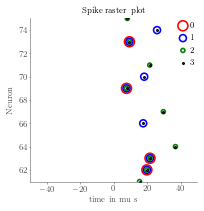

In [2]:
pop_xor = np.loadtxt("pop_xor.data")
pop_xor[:, 1] /= 250  # use times up to 200µs instead of 10ms
pop_xor[:, 0] -= 1  # start at zero until 95
pop_xor_spiketrains = {0 : (pop_xor[:20], 0),
                    1 : (pop_xor[20:60],1),
                    2 : (pop_xor[60:100],1),
                    3 : (pop_xor[100:160],0)}

colors = ["red", "blue", "green", "black"]
target = [0, 1, 1, 0]
m = ["o","o","o","o"]
s = [(r)**2 for r in np.arange(1,11,3)]
s = s[::-1]
lw = 1.6
fig = plt.figure(figsize=(3,3))
ax = fig.gca()
for p, (spiketrain, c) in pop_xor_spiketrains.items():
    if p != 3:
        ax.scatter(spiketrain[:,1]*1e6, spiketrain[:,0], s=s[p], lw=lw, facecolors='none', edgecolors=colors[p], label=p)
    else:
        ax.scatter(spiketrain[:,1]*1e6, spiketrain[:,0], s=s[p], lw=2, color=colors[p], label=p)
#ax.legend(["$S_{%s}$" %i for i in range(1,5)], bbox_to_anchor=(1,1))
ax.legend()
ax.set_ylim(61, 75)
ax.set_xlim(-50, 50)
ax.set_title('Spike raster plot')
ax.set_xlabel('time in mu s')
ax.set_ylabel('Neuron')
#plt.legend.lab
#save_plot(fig, "superspiketask", (3,3))


In [3]:
ax.get_legend_handles_labels()

([<matplotlib.collections.PathCollection at 0x7fa1c9eff670>,
 ['0', '1', '2', '3'])

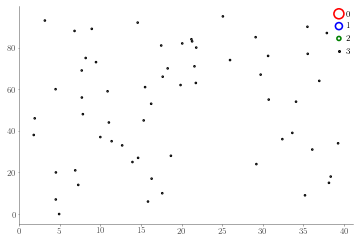

In [4]:
figlegend = plt.figure()
plt.scatter(spiketrain[:,1]*1e6, spiketrain[:,0], s=s[p], lw=lw, facecolors='none', edgecolors=colors[p])
plt.legend(*ax.get_legend_handles_labels())

In [5]:
ax.get_legend_handles_labels()

([<matplotlib.collections.PathCollection at 0x7fa1c9eff670>,
 ['0', '1', '2', '3'])

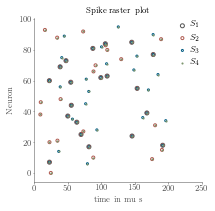

In [3]:
pop_xor = np.loadtxt("pop_xor.data")
pop_xor[:, 1] /= 50  # use times up to 200µs instead of 10ms
pop_xor[:, 0] -= 1  # start at zero until 95
pop_xor_spiketrains = {0 : (pop_xor[:20], 0),
                    1 : (pop_xor[20:60],1),
                    2 : (pop_xor[60:100],1),
                    3 : (pop_xor[100:160],0)}

colors = ["#555555", "#AF5A50", "#005B82", "#7D966E", "#D7AA50"]
target = [0, 1, 1, 0]
m = ["o","o","o","o"]
s = [(r)**2 for r in np.arange(1,5,1)]
s = s[::-1]
lw = 1
fig = plt.figure(figsize=(3,3))
for p, (spiketrain, c) in pop_xor_spiketrains.items():
    if p != 3:
        plt.scatter(spiketrain[:,1]*1e6, spiketrain[:,0], s=s[p], lw=lw, facecolors='none', edgecolors=colors[p])
    else:
        plt.scatter(spiketrain[:,1]*1e6, spiketrain[:,0], s=s[p], lw=1.1, color=colors[p])
plt.legend(["$S_{%s}$" %i for i in range(1,5)], bbox_to_anchor=(1,1))
#plt.ylim(60, 72)
plt.xlim(0, 250)
plt.title('Spike raster plot')
plt.xlabel('time in mu s')
plt.ylabel('Neuron')
save_plot(fig, "superspiketask", (3,3))

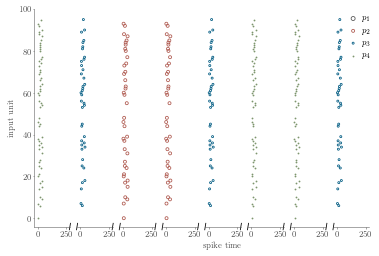

In [110]:
pop_xor = np.loadtxt("pop_xor.data")
pop_xor[:, 1] /= 250  # use times up to 200µs instead of 10ms
pop_xor[:, 0] -= 1  # start at zero until 95
pop_xor_spiketrains = {0: (pop_xor[:20], 0),
                       1: (pop_xor[20:60], 1),
                       2: (pop_xor[60:100], 1),
                       3: (pop_xor[100:160], 0)}

colors = ["#555555", "#AF5A50", "#005B82", "#7D966E", "#D7AA50"]
target = [0, 1, 1, 0]

s = [(r) ** 2 for r in np.arange(1, 5, 1)]
s = s[::-1]
lw = 0.8

batchsize = 8
dt = 250
fig, axes = plt.subplots(1, batchsize)
batch = np.random.randint(0, 4, size=batchsize)
for i, p in enumerate(batch):
    ax = axes[i]
    (spiketrain, c) = pop_xor_spiketrains[p]
    if p != 3:
        ax.scatter(spiketrain[:, 1] * 1e6 + 250*i, spiketrain[:, 0], s=s[p], lw=lw, facecolors='none',
                    edgecolors=colors[p])
    else:
        ax.scatter(spiketrain[:, 1] * 1e6 + 250*i, spiketrain[:, 0], s=s[p], lw=lw, color=colors[p])

    # cut x axis
    ax.set_xlim(i*dt - 30, (i+1)*dt+30)  
    if i != 0:
        ax.spines['left'].set_visible(False) # hide the spines 
        
    d = .015  # how big to make the diagonal lines in axes coordinates
    if i != (batchsize-1):
        kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
        ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
    if i!= 0:
        kwargs.update(transform=ax.transAxes) 
        ax.plot((-d, +d), (- d,  + d), **kwargs)
    if i!=0:
        ax.yaxis.set_ticks([])
    ax.set_ylim(-4,100)
    ax.xaxis.set_ticklabels([250, 0]*8)
    ax.xaxis.tick_bottom()
#axes[0].yaxis.set_ticks([])
#axes[0].yaxis.tick_left()    
fig.legend(*legend_handles_labels, loc='upper right', bbox_to_anchor=(.86, .85))
# plt.legend(["$S_{%s}$, $\mathrm{class}=%s" % (i, target[i-1]) for i in range(1, 5)], loc='upper right', bbox_to_anchor=(1, 0.75))
#plt.xlim(-30, 250*batchsize)
#plt.title('XOR Input  raster plot')
axes[4].set_xlabel('spike time ')
axes[0].set_ylabel('input unit')
save_plot(fig, "superspiketaskconsecutive", (6, 3))      
        


In [ ]:
plt.legend(*legend_handles_labels, loc='upper right', bbox_to_anchor=(1, 1))
# plt.legend(["$S_{%s}$, $\mathrm{class}=%s" % (i, target[i-1]) for i in range(1, 5)], loc='upper right', bbox_to_anchor=(1, 0.75))
plt.xlim(-30, 250*batchsize)
#plt.title('XOR Input  raster plot')
plt.xlabel('spike time ')
plt.ylabel('input unit')
#save_plot(fig, "superspiketaskconsecutive", (6, 3))

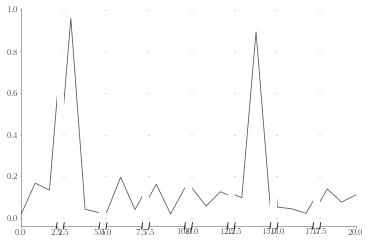

In [61]:
# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

n = 8
fig, axes = plt.subplots(1, n, sharey=True)
dt = 250/100
for i, ax in enumerate(axes.flatten()):
    ax.plot(pts)
    ax.set_xlim(i*dt, (i+1)*dt)  
    if i != 0:
        ax.spines['left'].set_visible(False) # hide the spines 
        
    d = .015  # how big to make the diagonal lines in axes coordinates
    if i != (n-1):
        kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
        ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
    if i!= 0:
        kwargs.update(transform=ax.transAxes) 
        ax.plot((-d, +d), (- d,  + d), **kwargs)  

#ax.xaxis.tick_top()
#ax.tick_params(labeltop='off')  # don't put tick labels at the top
#ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.


#d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
#kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
#ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

#kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
#ax2.plot((-d, +d), (- d,  + d), **kwargs)  # bottom-left diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()


In [172]:
ax.axe

AttributeError: 'AxesSubplot' object has no attribute 'prop_cycle'

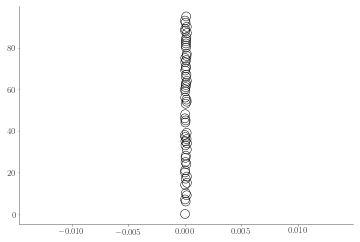

In [90]:

plt.scatter(spiketrain[:,1], spiketrain[:,0], s=80, facecolors='none', edgecolors=colors[p])
plt.show()

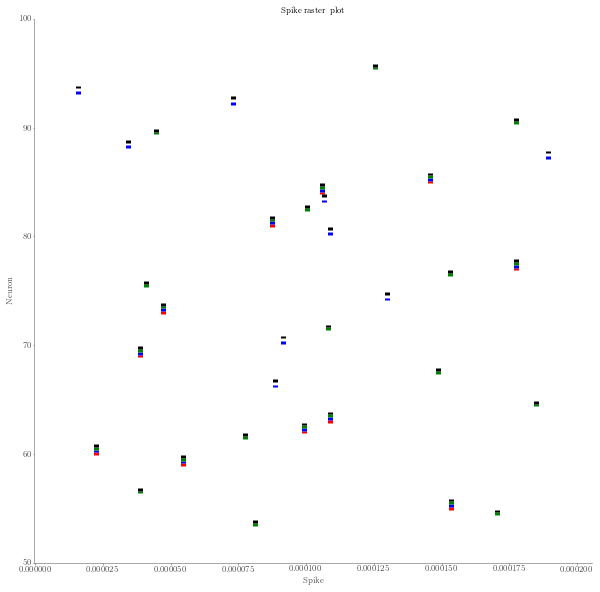

In [50]:
# Set the random seed for data generation
fig = plt.figure(figsize=(10,10))
lw = 5
ll = 0.25
for p, (spiketrain, c) in pop_xor_spiketrains.items():
    #plt.scatter(spiketrain[:,1], spiketrain[:,0],s=55,marker=m[p], color=colors[p],alpha = 0.5)
    plt.eventplot(spiketrain[:,1:2], lineoffsets=spiketrain[:,0]+p*ll, linewidths=lw, linelengths=ll, color=colors[p], alpha=1)
    plt.ylim(50,100)
plt.title('Spike raster plot')
plt.xlabel('Spike')
plt.ylabel('Neuron')
plt.show()

In [41]:
spiketrain[:,1]

array([2.4660e-05, 7.9320e-05, 2.2600e-05, 1.7592e-04, 8.8100e-05,
       3.6420e-05, 1.9066e-04, 8.1560e-05, 1.9174e-04, 2.2660e-05,
       3.4560e-05, 1.4600e-04, 6.9760e-05, 7.3240e-05, 9.3420e-05,
       1.8040e-04, 6.3440e-05, 1.9628e-04, 5.6960e-05, 1.6198e-04,
       5.0000e-05, 9.0400e-06, 1.6812e-04, 5.5260e-05, 7.6680e-05,
       9.6400e-06, 3.9260e-05, 8.1280e-05, 1.7040e-04, 1.5360e-04,
       3.8640e-05, 5.4460e-05, 2.2480e-05, 7.7540e-05, 9.9360e-05,
       1.0876e-04, 1.8470e-04, 8.8380e-05, 1.4864e-04, 3.8560e-05,
       9.1440e-05, 1.0792e-04, 4.7340e-05, 1.2980e-04, 4.1000e-05,
       1.5322e-04, 1.7760e-04, 1.0900e-04, 8.7460e-05, 1.0040e-04,
       1.0648e-04, 1.0604e-04, 1.4556e-04, 1.8936e-04, 3.4140e-05,
       4.4740e-05, 1.7742e-04, 7.2980e-05, 1.5880e-05, 1.2540e-04])

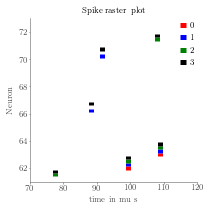

In [58]:
# Set the random seed for data generation
fig = plt.figure(figsize=(3,3))
lw = 5
ll = 0.25
for p, (spiketrain, c) in pop_xor_spiketrains.items():
    plt.eventplot(spiketrain[:,1:2]*1e6, lineoffsets=spiketrain[:,0]+p*ll, linewidths=lw, linelengths=ll, color=colors[p], alpha=1)
    plt.eventplot(spiketrain[:1,1:2], lineoffsets=spiketrain[0,0]+p*ll, linewidths=lw, linelengths=ll, color=colors[p], alpha=1, label=p)

plt.ylim(61, 73)
plt.xlim(70, 120)
plt.legend(bbox)
plt.title('Spike raster plot')
plt.xlabel('time in mu s')
plt.ylabel('Neuron')
plt.show()

In [59]:
pop_xor

array([[7.0000e+00, 2.2600e-05],
       [1.7000e+01, 8.1560e-05],
       [1.8000e+01, 1.9174e-04],
       [2.4000e+01, 1.4600e-04],
       [2.5000e+01, 6.9760e-05],
       [3.3000e+01, 6.3440e-05],
       [3.7000e+01, 5.0000e-05],
       [3.9000e+01, 1.6812e-04],
       [4.4000e+01, 5.5260e-05],
       [5.5000e+01, 1.5360e-04],
       [5.9000e+01, 5.4460e-05],
       [6.0000e+01, 2.2480e-05],
       [6.2000e+01, 9.9360e-05],
       [6.3000e+01, 1.0876e-04],
       [6.9000e+01, 3.8560e-05],
       [7.3000e+01, 4.7340e-05],
       [7.7000e+01, 1.7760e-04],
       [8.1000e+01, 8.7460e-05],
       [8.4000e+01, 1.0604e-04],
       [8.5000e+01, 1.4556e-04],
       [0.0000e+00, 2.4660e-05],
       [7.0000e+00, 2.2600e-05],
       [9.0000e+00, 1.7592e-04],
       [1.0000e+01, 8.8100e-05],
       [1.5000e+01, 1.9066e-04],
       [1.7000e+01, 8.1560e-05],
       [1.8000e+01, 1.9174e-04],
       [2.0000e+01, 2.2660e-05],
       [2.1000e+01, 3.4560e-05],
       [2.4000e+01, 1.4600e-04],
       [2.

In [18]:
n = 100
dac_wait_time = 1e4
minV = 0.1
maxV = 1.1

# using vreset
cadc_storage = np.zeros((n, 256))
dac_vals = np.linspace(0, 4095, n).astype(int)
daclsb2V = lambda x: x * 2.5 / 4096
V2daclsb = lambda x: (x * 4096 / 2.5).astype(int)

dac_in_V = daclsb2V(dac_vals)

# dynamic range
dynamic_range_in_V = dac_in_V[(dac_in_V <= maxV) & (dac_vals > minV)]
print(dynamic_range_in_V)
print(dynamic_range_in_V.shape)
dynamic_range_in_dac = V2daclsb(dynamic_range_in_V)

[0.02502441 0.05004883 0.07568359 0.10070801 0.12573242 0.15136719
 0.1763916  0.20141602 0.22705078 0.2520752  0.27770996 0.30273438
 0.32775879 0.35339355 0.37841797 0.40344238 0.42907715 0.45410156
 0.47912598 0.50476074 0.52978516 0.55541992 0.58044434 0.60546875
 0.63110352 0.65612793 0.68115234 0.70678711 0.73181152 0.75683594
 0.7824707  0.80749512 0.83312988 0.8581543  0.88317871 0.90881348
 0.93383789 0.9588623  0.98449707 1.00952148 1.0345459  1.06018066
 1.08520508]
(43,)


In [19]:
dynamic_range_in_dac

array([  41,   82,  124,  165,  206,  248,  289,  330,  372,  413,  455,
        496,  537,  579,  620,  661,  703,  744,  785,  827,  868,  910,
        951,  992, 1034, 1075, 1116, 1158, 1199, 1240, 1282, 1323, 1365,
       1406, 1447, 1489, 1530, 1571, 1613, 1654, 1695, 1737, 1778])